In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [4]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.1.2
2.5


In [5]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [6]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [7]:
planning_steps

array([0, 1, 2])

In [8]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [9]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [10]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [11]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x000001881A623F78>)
ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x000001881A623F78>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x000001881A623F78>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function=<function sum_over at 0x000001881A623F78>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function

#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=20)
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments
policies = experiments['policy']

for i, policy in enumerate(np.unique(policies)):
    experiments.loc[experiments['policy']==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]
sns.pairplot(A_3data, hue='policy', vars=['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

In [12]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=4)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 4 policies * 1 model(s) = 400 experiments
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 280 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,118.0,173.353004,1,0.709739,151.695226,1.5,0.172916,143.023789,1.5,0.978726,...,4.0,1.0,9.0,7.0,5.0,3.0,1.0,0,0,dikesnet
1,9.0,92.186340,10,0.272335,99.004896,1,0.544319,223.280359,1,0.029398,...,4.0,1.0,9.0,7.0,5.0,3.0,1.0,1,0,dikesnet
2,99.0,55.847523,10,0.386951,44.209307,1,0.008802,41.283620,10,0.357508,...,4.0,1.0,9.0,7.0,5.0,3.0,1.0,2,0,dikesnet
3,58.0,62.245153,1,0.682167,244.854608,1.5,0.190921,126.648446,1.5,0.734653,...,4.0,1.0,9.0,7.0,5.0,3.0,1.0,3,0,dikesnet
4,72.0,140.751167,1.5,0.429362,265.699569,10,0.678727,136.501901,1,0.055309,...,4.0,1.0,9.0,7.0,5.0,3.0,1.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,32.0,79.504293,1,0.310976,137.528164,1.5,0.220036,265.472984,1,0.776050,...,0.0,5.0,5.0,10.0,2.0,9.0,4.0,95,3,dikesnet
396,7.0,336.346933,10,0.592637,95.670406,10,0.251037,124.876357,1.5,0.655881,...,0.0,5.0,5.0,10.0,2.0,9.0,4.0,96,3,dikesnet
397,95.0,275.694835,1,0.035601,225.985452,1,0.166196,166.848947,10,0.189728,...,0.0,5.0,5.0,10.0,2.0,9.0,4.0,97,3,dikesnet
398,75.0,300.141223,1.5,0.643658,118.084062,1.5,0.654389,159.666093,10,0.519954,...,0.0,5.0,5.0,10.0,2.0,9.0,4.0,98,3,dikesnet


In [54]:
experiments.iloc[299:400,19:-18]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2
299,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
300,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
301,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
302,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
303,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
396,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
397,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
398,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [55]:
experiments.iloc[299:400,-18:-2]

,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat
299,0.0,0.0,4.0,2.0,8.0,6.0,9.0,10.0,10.0,9.0,9.0,1.0,4.0,3.0,1.0,0.0
300,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0
301,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0
302,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0
303,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0
396,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0
397,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0
398,3.0,6.0,1.0,6.0,4.0,3.0,3.0,2.0,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0


In [15]:
policies = experiments['policy']

for i, policy in enumerate(np.unique(policies)):
    experiments.loc[experiments['policy']==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

In [36]:
data['total expected Annual Damage']=data['A.1_Expected Annual Damage']+data['A.2_Expected Annual Damage']+data['A.3_Expected Annual Damage']+data['A.4_Expected Annual Damage']+data['A.5_Expected Annual Damage']
data['total dike investment costs']=data['A.1_Dike Investment Costs']+data['A.2_Dike Investment Costs']+data['A.3_Dike Investment Costs']+data['A.4_Dike Investment Costs']+data['A.5_Dike Investment Costs']
data['total Expected Number of Deaths']=data['A.1_Expected Number of Deaths']+data['A.2_Expected Number of Deaths']+data['A.3_Expected Number of Deaths']+data['A.4_Expected Number of Deaths']+data['A.5_Expected Number of Deaths']

In [38]:
A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]
A_totaldata=data[['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

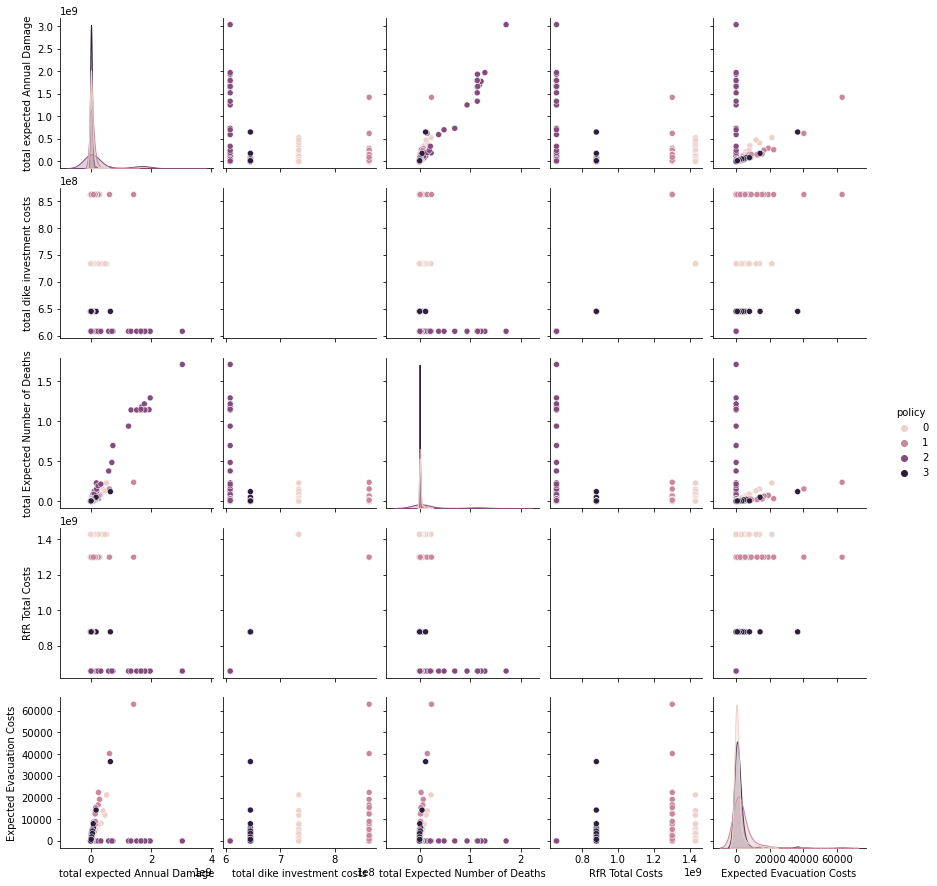

In [39]:
sns.pairplot(A_totaldata, hue='policy', vars=['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

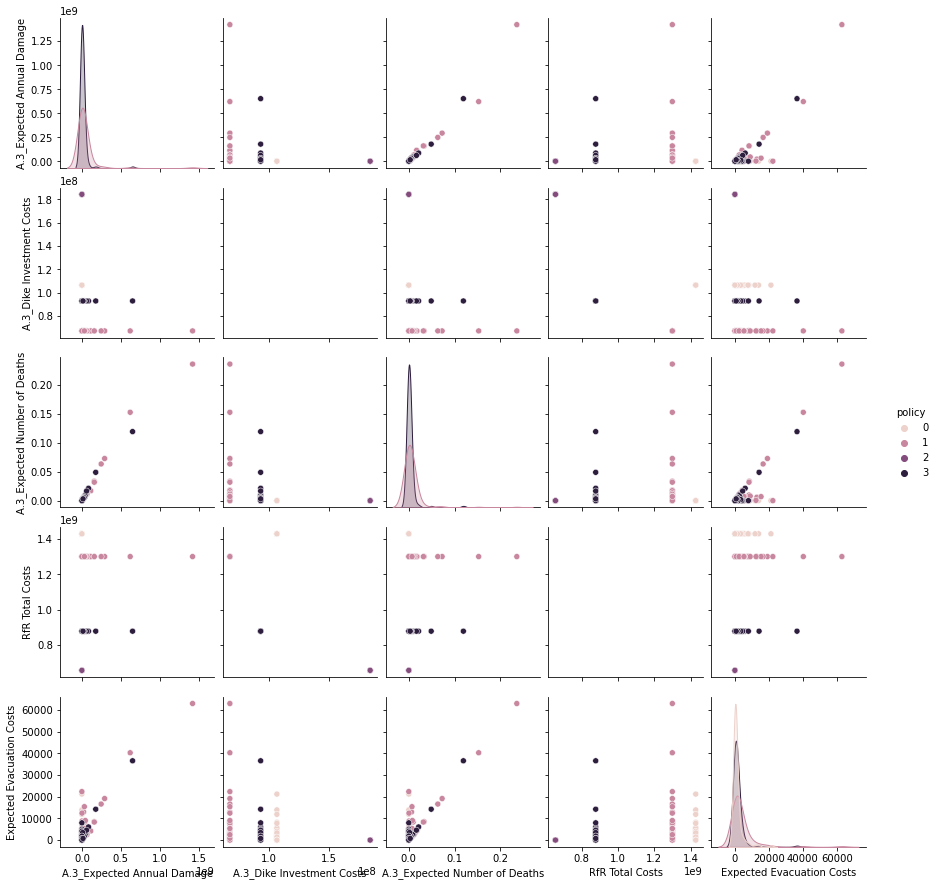

In [16]:
sns.pairplot(A_3data, hue='policy', vars=['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

Things to conclude:
*  Seems to be a clear connection between dike investment costs and expected evacuation costs & expected number of deaths-> the more dike investment, the less expected evactuation costs and the less expected number of deaths.
* This is not as clearly visible for the RFR total costs. More money spend on the RFR total costs does not seem to influence expected evacuation and expected number of deaths A3 positively, based on the above figure.
* Expected number of deaths, expected annual damage and expected evacuation costs seem positively  correlated.
    

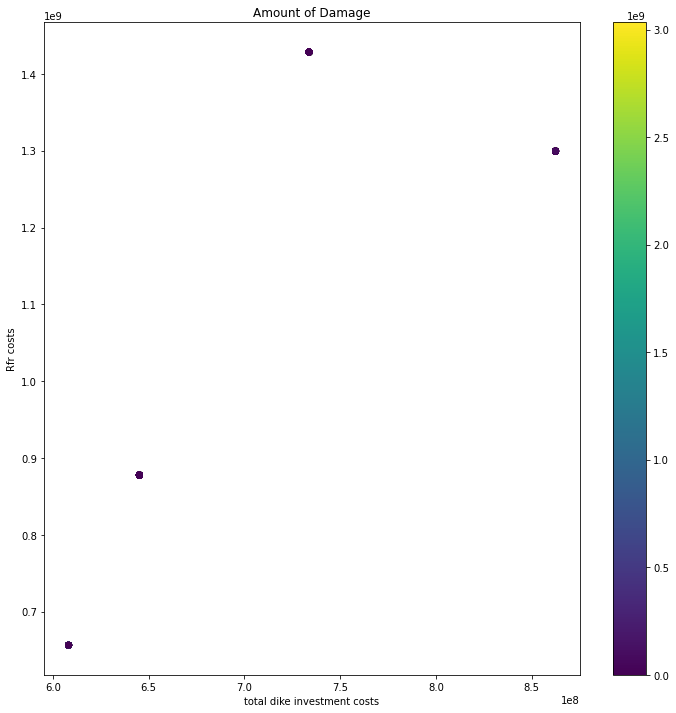

In [82]:
ADAMAGE = A_totaldata['total expected Annual Damage']
ADEATH = A_totaldata['total Expected Number of Deaths']
ACOST = A_totaldata['Expected Evacuation Costs']


fig, ax = plt.subplots(figsize=(12,12))
im=ax.scatter(A_totaldata['total dike investment costs'], A_totaldata['RfR Total Costs'], c=ADAMAGE,vmin=A_totaldata['total expected Annual Damage'].min(),vmax=A_totaldata['total expected Annual Damage'].max())
ax.set_title('Amount of Damage')
ax.set_xlabel('total dike investment costs')
ax.set_ylabel('Rfr costs')
fig.colorbar(im, ax=ax)


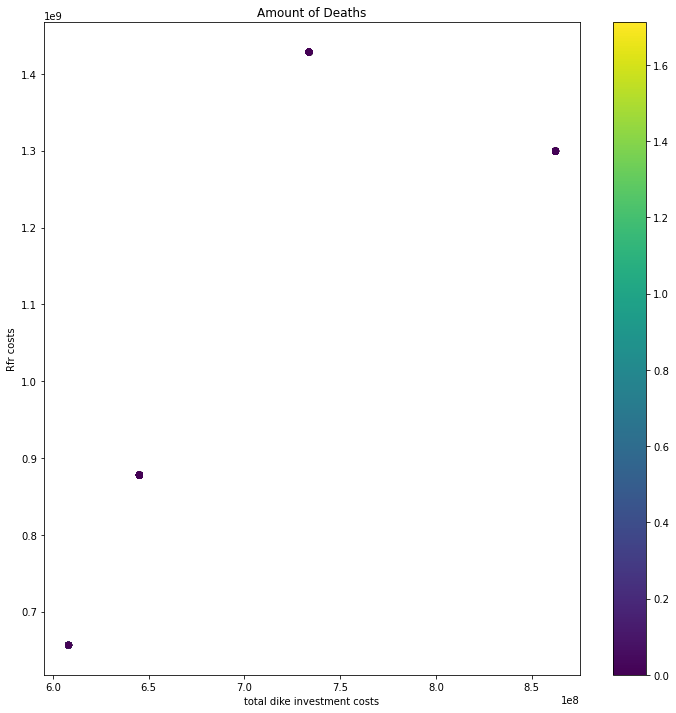

In [81]:
fig, ax = plt.subplots(figsize=(12,12))
im=ax.scatter(A_totaldata['total dike investment costs'], A_totaldata['RfR Total Costs'], c=ADEATH,vmin=A_totaldata['total Expected Number of Deaths'].min(),vmax=A_totaldata['total Expected Number of Deaths'].max())
ax.set_title('Amount of Deaths')
ax.set_xlabel('total dike investment costs')
ax.set_ylabel('Rfr costs')
fig.colorbar(im, ax=ax)

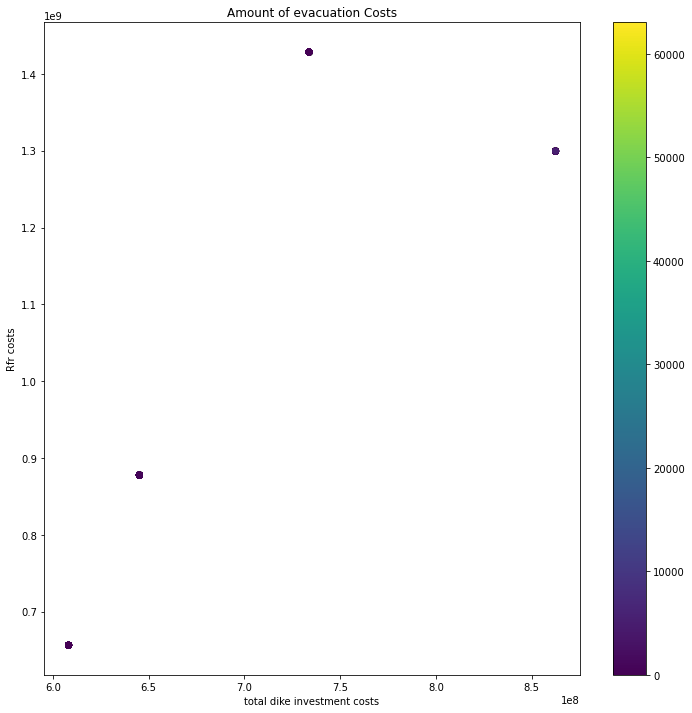

In [80]:
fig, ax = plt.subplots(figsize=(12,12))
im=ax.scatter(A_totaldata['total dike investment costs'], A_totaldata['RfR Total Costs'], c=ACOST,vmin=A_totaldata['Expected Evacuation Costs'].min(),vmax=A_totaldata['Expected Evacuation Costs'].max())
ax.set_title('Amount of evacuation Costs')
ax.set_xlabel('total dike investment costs')
ax.set_ylabel('Rfr costs')
fig.colorbar(im, ax=ax)

In [18]:
worst50 = sorted(outcomes['A.3_Expected Number of Deaths'])[-50:]
# worst = worst10[-1:][0]
# print(worst)
worst50

[0.001765799311627874,
 0.0017784333351820697,
 0.002079432639858425,
 0.002091017913847313,
 0.002130998468113734,
 0.002132827365893079,
 0.0021428335417499724,
 0.003057740389174122,
 0.0030737374997604743,
 0.0033170803911732063,
 0.003397740469885097,
 0.0034059074923536276,
 0.0034092864050581343,
 0.0034572078865320334,
 0.0038710419339572566,
 0.003974990953709133,
 0.004048173038605261,
 0.004621542861928006,
 0.004707425591075618,
 0.004916269720921775,
 0.0049196275168909105,
 0.0049569141074703406,
 0.005519169294026706,
 0.005523493012303939,
 0.005553443198429621,
 0.005908938089292715,
 0.005931106770561186,
 0.006080083948109948,
 0.0069775612980177495,
 0.007147117241008744,
 0.007219260662132115,
 0.00797255103523891,
 0.00848603397886858,
 0.009726637802297582,
 0.010345228074386205,
 0.010989041639112945,
 0.011295999642916664,
 0.013413433206561732,
 0.01664043238803347,
 0.017056646897403313,
 0.018193019392263688,
 0.021402246074954886,
 0.031881042284561234,
 0.

In [29]:
y = outcomes['A.3_Expected Number of Deaths'] > worst50[0] 
y

400

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 400 points remaining, containing 49 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055, coverage: 0.4489795918367347, density: 1.0 restricted_dimensions: 10


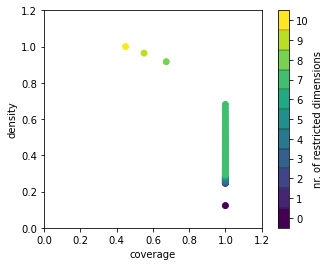

In [21]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['A.3_Expected Number of Deaths'] > worst50[0] 

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.01, mass_min=0.001)
box = prim_alg.find_box()

box.show_tradeoff()
plt.show()

In [88]:
experiments.dtypes

A.0_ID flood wave shape    float64
A.1_Bmax                   float64
A.1_Brate                   object
A.1_pfail                  float64
A.2_Bmax                   float64
A.2_Brate                   object
A.2_pfail                  float64
A.3_Bmax                   float64
A.3_Brate                   object
A.3_pfail                  float64
A.4_Bmax                   float64
A.4_Brate                   object
A.4_pfail                  float64
A.5_Bmax                   float64
A.5_Brate                   object
A.5_pfail                  float64
discount rate 0             object
discount rate 1             object
discount rate 2             object
0_RfR 0                    float64
0_RfR 1                    float64
0_RfR 2                    float64
1_RfR 0                    float64
1_RfR 1                    float64
1_RfR 2                    float64
2_RfR 0                    float64
2_RfR 1                    float64
2_RfR 2                    float64
3_RfR 0             

coverage           1
density     0.422414
id                43
mass            0.29
mean        0.422414
res_dim            7
Name: 43, dtype: object

                            box 43              \
                               min         max   
A.3_pfail                 0.006897    0.709098   
A.2_Bmax                 32.731019  341.560137   
A.3_Bmax                 33.069601  346.892512   
0_RfR 0                   0.500000    1.000000   
A.1_Bmax                 39.115465  346.162591   
A.1_pfail                 0.011219    0.951871   
A.0_ID flood wave shape   0.500000  132.000000   

                                                                    
                                                         qp values  
A.3_pfail                            [-1.0, 0.0011059000418849575]  
A.2_Bmax                                [-1.0, 0.3283508102009917]  
A.3_Bmax                                [-1.0, 0.4418490666585794]  
0_RfR 0                             [1.74449558570273

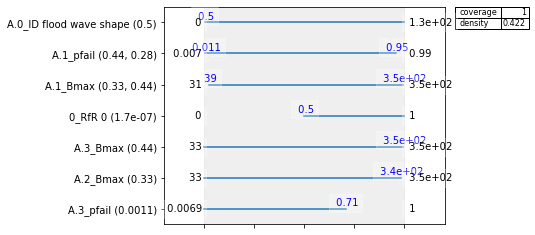

In [32]:
box.inspect(43)
box.inspect(43,style='graph')
plt.show()

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


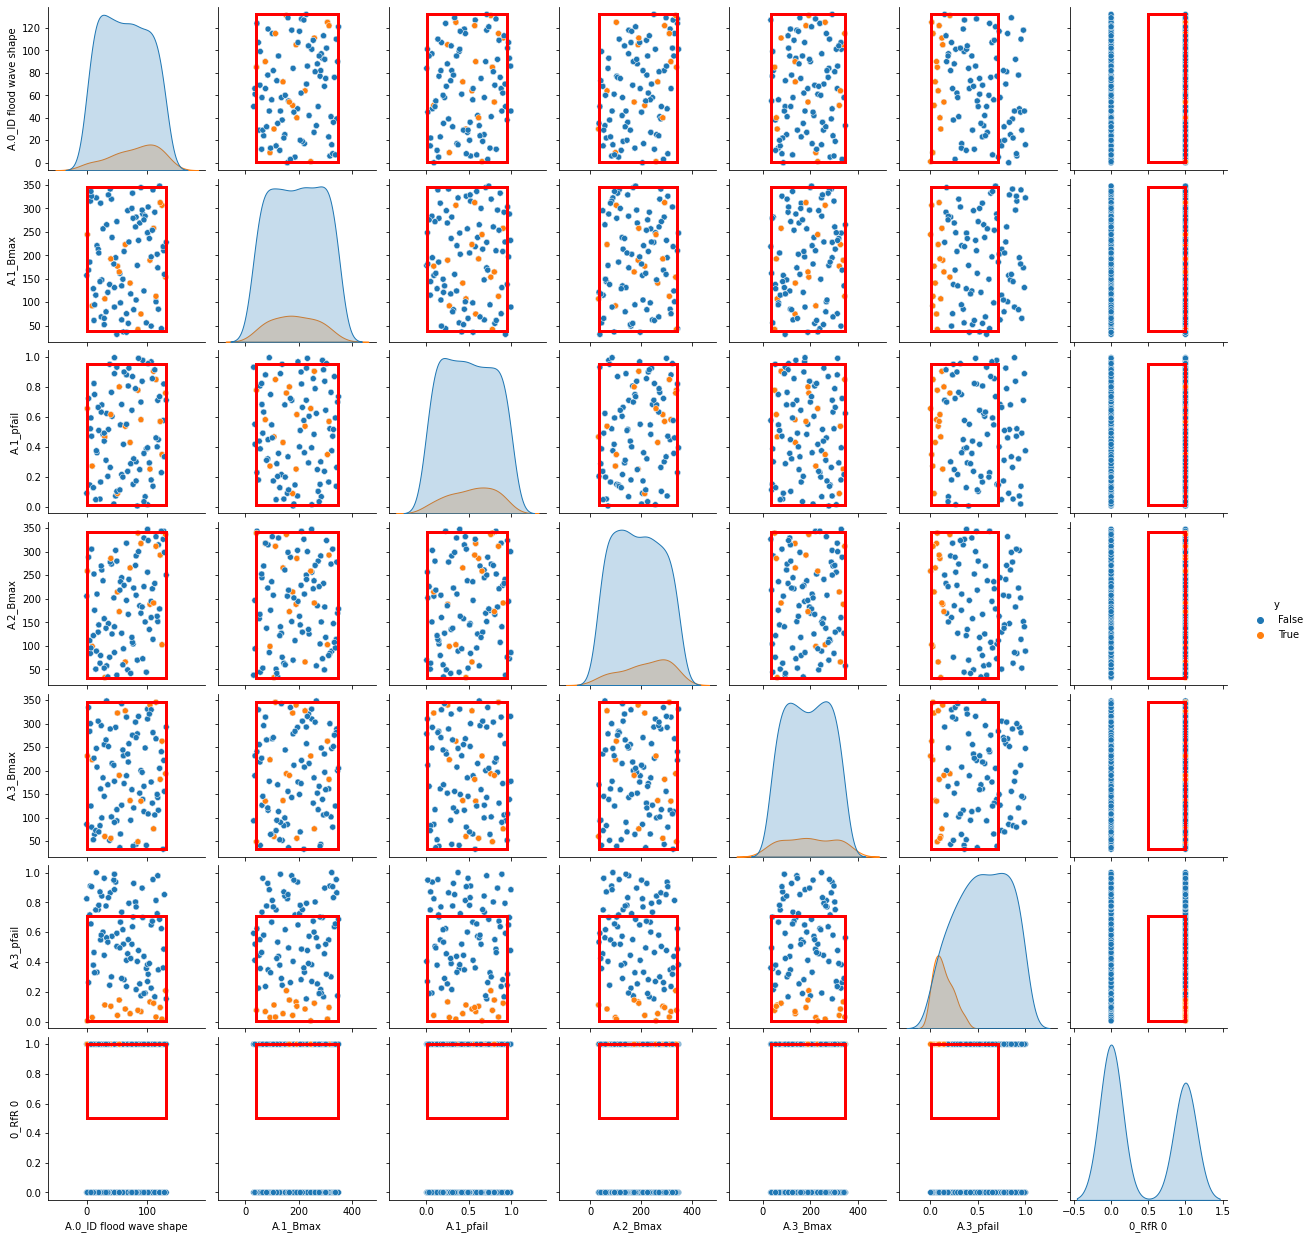

In [22]:
box.show_pairs_scatter(43)
plt.show()

In [86]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,policy,model
0,118.0,173.353004,1,0.709739,151.695226,1.5,0.172916,143.023789,1.5,0.978726,...,1.0,4.0,1.0,9.0,7.0,5.0,3.0,1.0,0,dikesnet
1,9.0,92.186340,10,0.272335,99.004896,1,0.544319,223.280359,1,0.029398,...,1.0,4.0,1.0,9.0,7.0,5.0,3.0,1.0,0,dikesnet
2,99.0,55.847523,10,0.386951,44.209307,1,0.008802,41.283620,10,0.357508,...,1.0,4.0,1.0,9.0,7.0,5.0,3.0,1.0,0,dikesnet
3,58.0,62.245153,1,0.682167,244.854608,1.5,0.190921,126.648446,1.5,0.734653,...,1.0,4.0,1.0,9.0,7.0,5.0,3.0,1.0,0,dikesnet
4,72.0,140.751167,1.5,0.429362,265.699569,10,0.678727,136.501901,1,0.055309,...,1.0,4.0,1.0,9.0,7.0,5.0,3.0,1.0,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,32.0,79.504293,1,0.310976,137.528164,1.5,0.220036,265.472984,1,0.776050,...,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0,3,dikesnet
396,7.0,336.346933,10,0.592637,95.670406,10,0.251037,124.876357,1.5,0.655881,...,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0,3,dikesnet
397,95.0,275.694835,1,0.035601,225.985452,1,0.166196,166.848947,10,0.189728,...,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0,3,dikesnet
398,75.0,300.141223,1.5,0.643658,118.084062,1.5,0.654389,159.666093,10,0.519954,...,8.0,0.0,5.0,5.0,10.0,2.0,9.0,4.0,3,dikesnet


In [32]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

In [ ]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
